In [420]:
import pandas as pd

# import csv
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_ids = df_train['PassengerId']

In [421]:
df_test.shape

(4277, 13)

In [422]:
df_test.shape

(4277, 13)

In [423]:
df_train.shape

(8693, 14)

In [424]:
def convert(df):
    df.drop(['Name', 'PassengerId'], axis=1, inplace=True)
    # split Cabin into letter and number
    df['Deck'] = df['Cabin'].str[0]
    df['Side'] = df['Cabin'].str[-1]
    # sum RoomService, FoodCourt, ShoppingMall, Spa and VRDeck into one column named "totalAmount", if value is NaN then set to 0
    df['totalAmount'] = df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1, skipna=True)
    # drop RoomService, FoodCourt, ShoppingMall, Spa and VRDeck
    df.drop(['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis=1, inplace=True)
    # fill age NaN with mean
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    # drop cabin
    df.drop(['Cabin'], axis=1, inplace=True)
    toNumerical(df)
    return df
    


In [425]:
def toNumerical(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            for i, val in enumerate(df[col].unique()):
                df[col] = df[col].replace(val, i)
    return df


In [426]:
# create train data with df_train and test data with df_test
X = df_train.drop(['Transported'], axis=1)
y = df_train['Transported']
X=convert(X)
convert(df_test)
# import split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# convert train and test data




In [427]:
print("x_train shape:", X_train.shape, "y_train shape:", y_train.shape)
print("x_test shape:", X_test.shape, "y_test shape:", y_test.shape)

x_train shape: (6954, 8) y_train shape: (6954,)
x_test shape: (1739, 8) y_test shape: (1739,)


In [428]:
X_train.isna().sum()

HomePlanet     0
CryoSleep      0
Destination    0
Age            0
VIP            0
Deck           0
Side           0
totalAmount    0
dtype: int64

<Axes: >

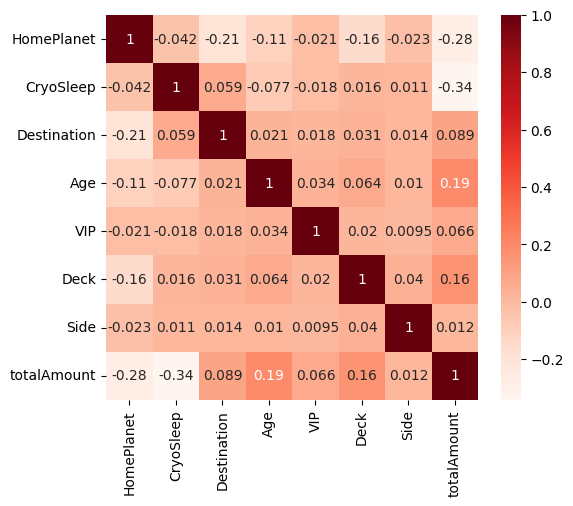

In [429]:
# create heatmap to see correlation between features
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,5))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

In [430]:
# create knn model and predict transport with test data
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# calculate accuracy
from sklearn.metrics import accuracy_score
acc_knn = accuracy_score(y_pred, y_test)
acc_knn

0.6946520989074181

In [431]:
# predict transported for test data with random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(accuracy_score(y_pred, y_test))

0.7096032202415181


In [432]:
# predict transported for test data with decision tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=5, random_state=42, max_leaf_nodes=60)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(accuracy_score(y_pred, y_test))

0.7412305922944221


In [433]:
X_train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,Deck,Side,totalAmount
799,0.0,0.0,2.0,57.0,0.0,0,1.0,7173.0
6331,1.0,0.0,3.0,20.0,0.0,3,0.0,809.0
8590,2.0,0.0,0.0,38.0,0.0,6,0.0,2382.0
2918,1.0,1.0,0.0,14.0,0.0,3,1.0,0.0
6650,1.0,0.0,0.0,24.0,0.0,1,0.0,631.0


In [434]:
ids = pd.read_csv("test.csv")['PassengerId']

# predict transported for test data with ada boost
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=37, random_state=42)
ada.fit(X_train, y_train)
y_pred = ada.predict(df_test)

csv(ids, y_pred)

In [435]:
list = []
for i in range(35, 50):
    ada = AdaBoostClassifier(n_estimators=i, random_state=42)
    ada.fit(X_train, y_train)
    y_pred = ada.predict(df_test)
    list.append(accuracy_score(y_pred, y_test))

# plot list to see which n_estimator is best
plt.plot(list)
plt.show()

    

ValueError: Found input variables with inconsistent numbers of samples: [4277, 1739]

In [ ]:
def csv(id, pred):
    df = pd.DataFrame({'PassengerId': id, 'Transported': pred})
    df.to_csv('submission3.csv', index=False)